# SALES PREDICTION 

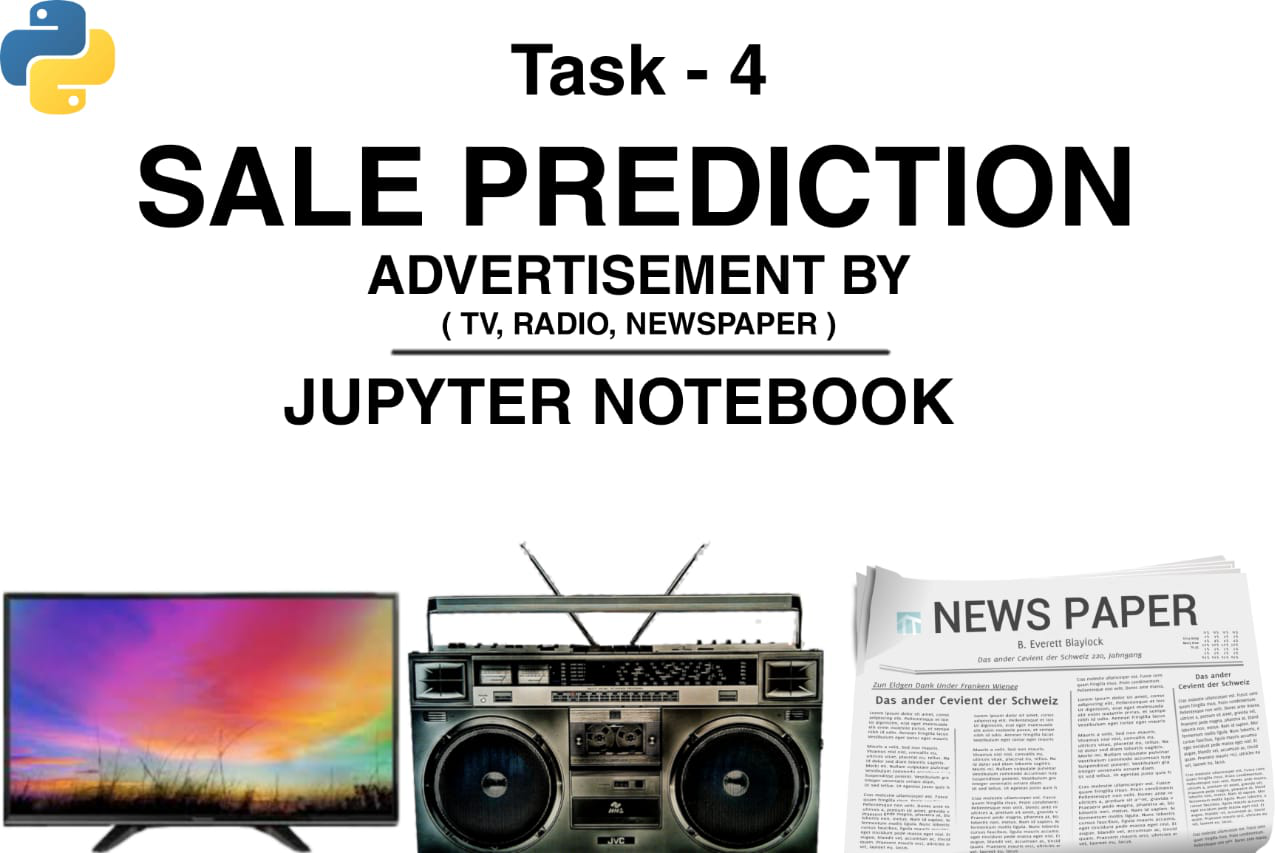

In [3]:
from IPython.display import display
from PIL import Image
image_path = "Task - 4.jpg"
img = Image.open(image_path)
display(img)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
sale = pd.read_csv(r"C:\Users\shubh\Downloads\advertising.csv")
sale.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
sale.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
sale.shape

(200, 4)

C:\ProgramData\anaconda\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


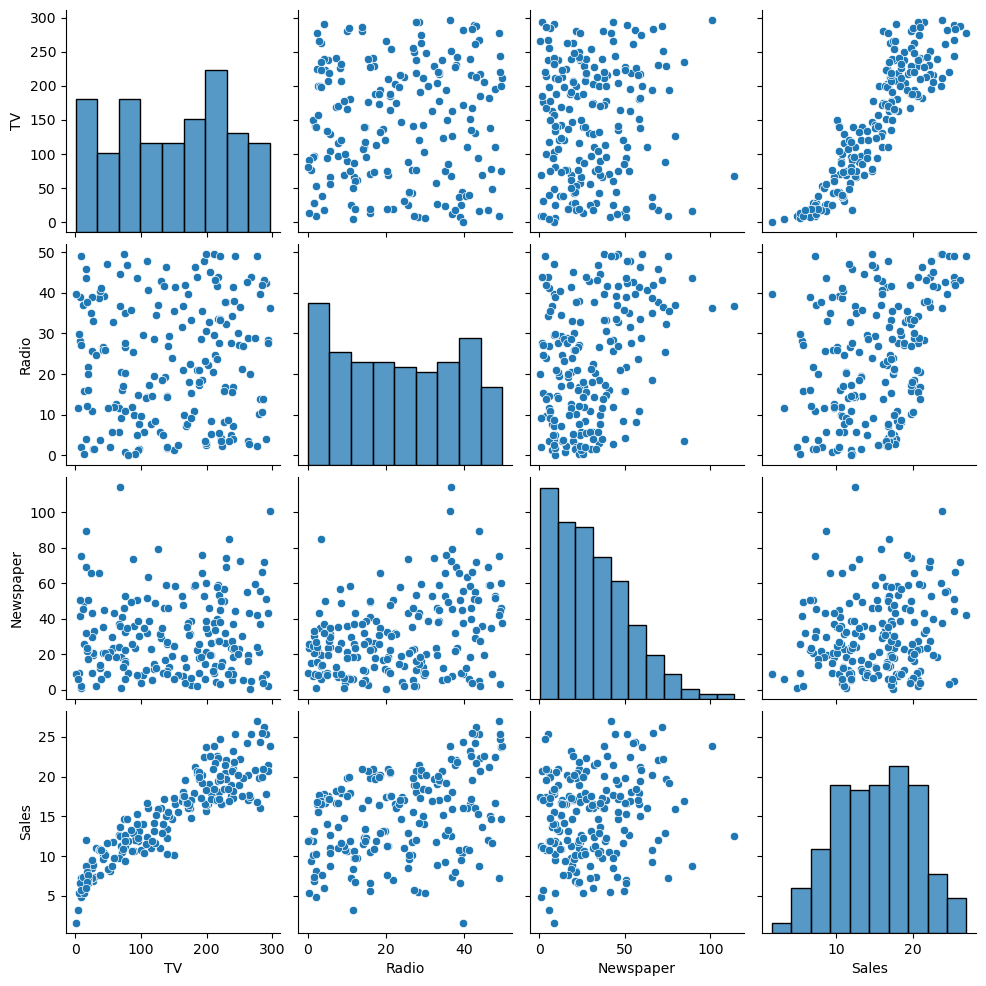

In [7]:
sns.pairplot(sale)
plt.show()

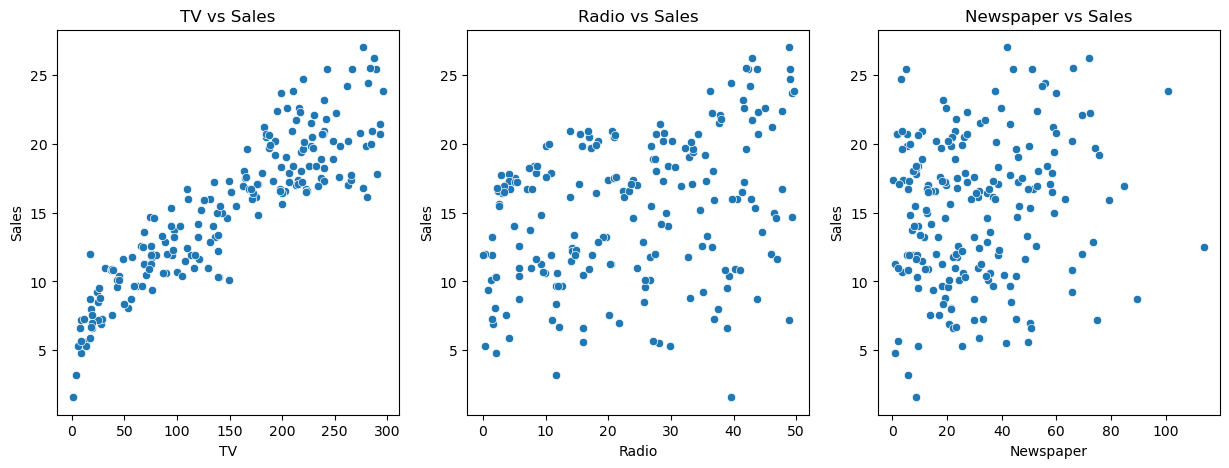

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(x=sale['TV'], y=sale['Sales'], ax=axes[0])
axes[0].set_title("TV vs Sales")
sns.scatterplot(x=sale['Radio'], y=sale['Sales'], ax=axes[1])
axes[1].set_title("Radio vs Sales")
sns.scatterplot(x=sale['Newspaper'], y=sale['Sales'], ax=axes[2])
axes[2].set_title("Newspaper vs Sales")
plt.show()

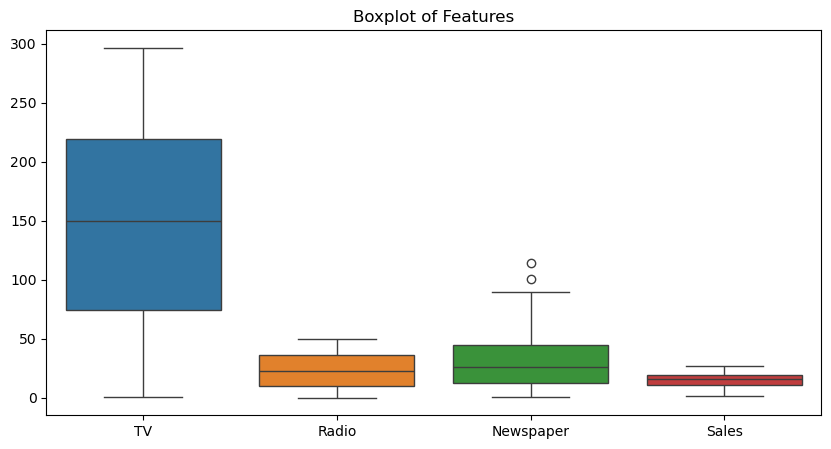

In [42]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=sale)
plt.title("Boxplot of Features")
plt.show()

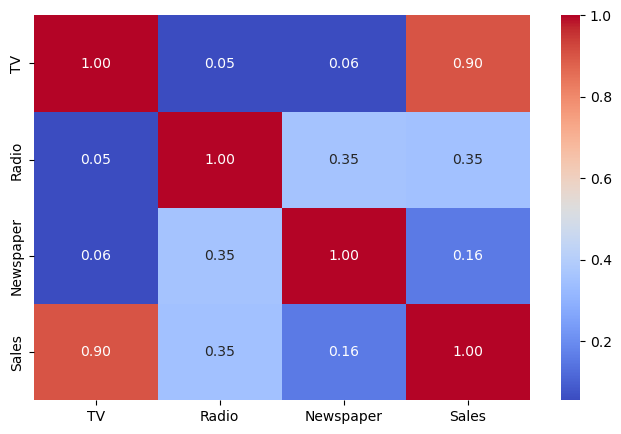

In [8]:
plt.figure(figsize=(8,5))
sns.heatmap(sale.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [9]:
X = sale.drop(columns=['Sales'])
y = sale['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [11]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [44]:
y_pred = model.predict(X_test)

In [14]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [15]:
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error: 1.27
Mean Squared Error: 2.91
Root Mean Squared Error: 1.71
R² Score: 0.91


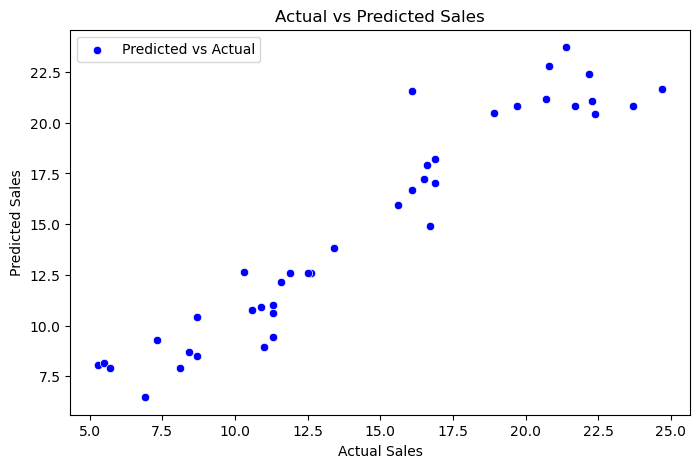

In [16]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, color="blue", label="Predicted vs Actual")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.show()

In [17]:
new_data = pd.DataFrame({"TV": [200], "Radio": [30], "Newspaper": [20]})
predicted_sales = model.predict(new_data)
print(f"Predicted Sales: {predicted_sales[0]:.2f}")

Predicted Sales: 18.73
